# VLM Backbone Benchmarking - Analysis

This notebook analyzes the results from benchmarking different vision backbones.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')

## Load Benchmark Results

In [2]:
# Load leaderboard
results_path = Path('../results')
if (results_path / 'leaderboard_benchmark.csv').exists():
    df = pd.read_csv(results_path / 'leaderboard_benchmark.csv')
    display(df)
else:
    print('No benchmark results found. Run: python scripts/run_batch.py --mode benchmark')

No benchmark results found. Run: python scripts/run_batch.py --mode benchmark


## Visualizations

NameError: name 'df' is not defined

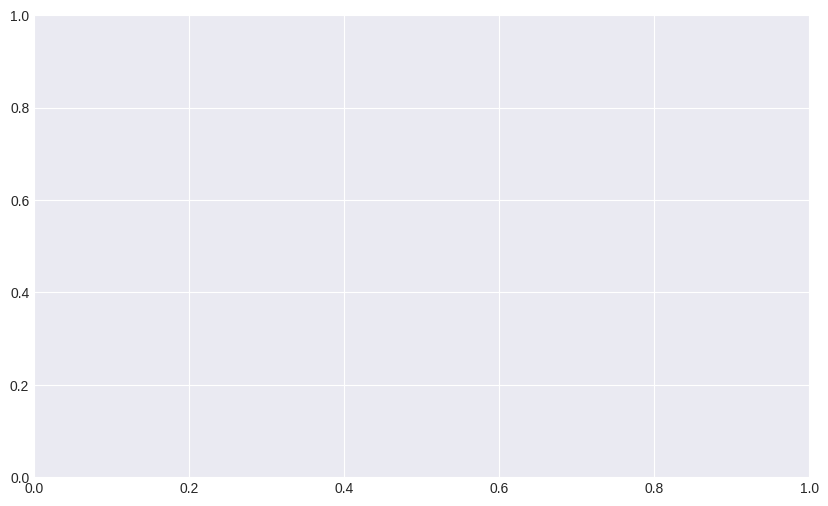

In [3]:
# Params vs FLOPs
fig, ax = plt.subplots(figsize=(10, 6))
scatter = ax.scatter(df['Params (M)'], df['FLOPs (G)'], s=100, alpha=0.6)

for idx, row in df.iterrows():
    ax.annotate(row['Model'], (row['Params (M)'], row['FLOPs (G)']), 
                fontsize=9, ha='right')

ax.set_xlabel('Parameters (M)')
ax.set_ylabel('FLOPs (G)')
ax.set_title('Model Complexity: Params vs FLOPs')
plt.tight_layout()
plt.savefig(results_path / 'params_vs_flops.png', dpi=150)
plt.show()

In [ ]:
# Latency comparison
fig, ax = plt.subplots(figsize=(12, 6))
df_sorted = df.sort_values('Latency (ms)')
ax.barh(df_sorted['Model'], df_sorted['Latency (ms)'])
ax.set_xlabel('Latency (ms)')
ax.set_title('Inference Latency Comparison')
plt.tight_layout()
plt.savefig(results_path / 'latency_comparison.png', dpi=150)
plt.show()

In [ ]:
# Throughput comparison
fig, ax = plt.subplots(figsize=(12, 6))
df_sorted = df.sort_values('Throughput (img/s)', ascending=False)
ax.barh(df_sorted['Model'], df_sorted['Throughput (img/s)'])
ax.set_xlabel('Throughput (images/sec)')
ax.set_title('Inference Throughput Comparison')
plt.tight_layout()
plt.savefig(results_path / 'throughput_comparison.png', dpi=150)
plt.show()

## Training Results

If you've run training experiments, you can load results from WandB or local logs here.